In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on AF3
use_AF3 = []
for k in range (len(data)):
    if data['home_team'][k] == 'AF3' and data['away_team'][k] not in ['AF1', 'AF2', 'AF3']:
        use_AF3.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'AF3' and data['home_team'][g] not in ['AF1', 'AF2', 'AF3']:
        use_AF3.append(g)
data_af3 = data.filter(items = use_AF3, axis = 0)
data_af3 = data_af3.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_af3 = data_af3.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_af3 = data_af3.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_af3 = data_af3.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
print(data_af3)

            date      home_team away_team  year  home  away  goal_margin
1120  1950-06-24            AF3      Asia  1950     1    -1            1
1126  1950-07-01            AF3      Asia  1950     1    -1            1
1131  1950-07-08            AF3      Asia  1950    -1     1            1
1138  1950-07-23            AF3      Asia  1950    -1     1            2
4089  1989-10-31            AF3      Asia  1989     1    -1            1
...          ...            ...       ...   ...   ...   ...          ...
7480  2012-10-12         Europe       AF3  2012     1    -1            1
7703  2014-03-05           Asia       AF3  2014    -1     1            1
7713  2014-05-26           Asia       AF3  2014     0     0            0
8176  2017-06-02  South_America       AF3  2017     1    -1            3
8583  2019-10-15  South_America       AF3  2019     1    -1            1

[91 rows x 7 columns]


In [4]:
af = []
opponent = []
match_status = []
for x in range (len(data_af3)):
    af.append('AF3')
    if np.array(data_af3['home_team'])[x] == 'AF3':
        opponent.append(np.array(data_af3['away_team'])[x])
        match_status.append(np.array(data_af3['home'])[x])
    else:
        opponent.append(np.array(data_af3['home_team'])[x])
        match_status.append(np.array(data_af3['away'])[x])
        
af3 = pd.DataFrame(data = {'africa_tier3' : af, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_af3['goal_margin']), 'year' : np.array(data_af3['year'])})

print(af3)

   africa_tier3       opponent  match_status  goal_margin  year
0           AF3           Asia             1            1  1950
1           AF3           Asia             1            1  1950
2           AF3           Asia            -1            1  1950
3           AF3           Asia            -1            2  1950
4           AF3           Asia             1            1  1989
..          ...            ...           ...          ...   ...
86          AF3         Europe            -1            1  2012
87          AF3           Asia             1            1  2014
88          AF3           Asia             0            0  2014
89          AF3  South_America            -1            3  2017
90          AF3  South_America            -1            1  2019

[91 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
af3_asia = []
af3_north_america =[]
af3_south_america =[]
af3_europe = []

for y in range (len(af3)):
    if opponent[y] == 'Asia':
        af3_asia.append(y)
    elif opponent[y] == 'North_America':
        af3_north_america.append(y)
    elif opponent[y] == 'South_America':
        af3_south_america.append(y)
    if opponent[y] == 'Europe':
        af3_europe.append(y)
#verifying
print(len(af3_europe) + len(af3_asia) + len(af3_south_america) + len(af3_north_america) )

91


In [6]:
#af3_vs_asia 
af3_vs_asia = af3.filter(items = af3_asia, axis = 0)

#af3_vs_north_america 
af3_vs_north_america = af3.filter(items = af3_north_america, axis = 0)

#af2_vs_south_america 
af3_vs_south_america = af3.filter(items = af3_south_america, axis = 0)

#af2_vs_europe 
af3_vs_europe = af3.filter(items = af3_europe, axis = 0)

af3_vs_asia.to_excel("Af_Tier3_vs_Asia.xlsx", index = False)
af3_vs_north_america.to_excel("Af_Tier3_vs_North_America.xlsx", index = False)
af3_vs_south_america.to_excel("Af_Tier3_vs_South_America.xlsx", index = False)
af3_vs_europe.to_excel("Af_Tier3_vs_Europe.xlsx", index = False)

   africa_tier3 opponent  match_status  goal_margin  year
7           AF3   Europe             0            0  1995
10          AF3   Europe            -1            2  1997
12          AF3   Europe             0            0  1998
15          AF3   Europe             1            1  1999
16          AF3   Europe             0            0  2000
17          AF3   Europe            -1            1  2002
19          AF3   Europe            -1            1  2003
29          AF3   Europe             1            1  2009
31          AF3   Europe            -1            2  2009
33          AF3   Europe            -1            1  2009
37          AF3   Europe             1            1  2010
40          AF3   Europe             1            1  2010
41          AF3   Europe             1            1  2013
44          AF3   Europe            -1            1  1924
50          AF3   Europe            -1            2  1953
56          AF3   Europe            -1            6  1958
60          AF

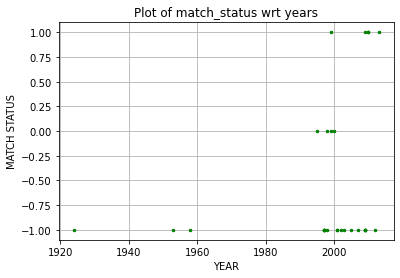

Text(0.5, 1.0, 'Histogram of match_status')

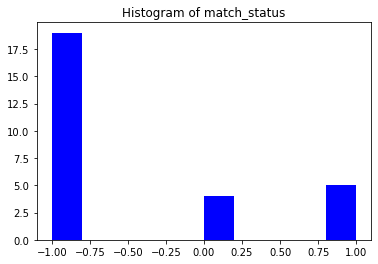

In [7]:
#checking
print(af3_vs_europe)

#plot af1_vs_europe
plt.plot(af3_vs_europe['year'], af3_vs_europe['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(af3_vs_europe['match_status'], color = 'blue')
plt.title('Histogram of match_status')